<a href="https://colab.research.google.com/github/harsh-tambi/CNN_CIFAR10_Dataset/blob/main/CNN_ON_CIFAR10_Datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
K = len(set(y_train))

In [6]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)



In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
1563/1563 [==============================] - 60s 37ms/step - loss: 1.5442 - accuracy: 0.4349 - val_loss: 1.2696 - val_accuracy: 0.5411
Epoch 2/15
1563/1563 [==============================] - 81s 52ms/step - loss: 1.2587 - accuracy: 0.5448 - val_loss: 1.1092 - val_accuracy: 0.6079
Epoch 3/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1228 - accuracy: 0.5978 - val_loss: 1.0087 - val_accuracy: 0.6431
Epoch 4/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0322 - accuracy: 0.6341 - val_loss: 0.9532 - val_accuracy: 0.6657
Epoch 5/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9413 - accuracy: 0.6660 - val_loss: 0.8994 - val_accuracy: 0.6893
Epoch 6/15
1563/1563 [==============================] - 79s 51ms/step - loss: 0.8748 - accuracy: 0.6902 - val_loss: 0.8960 - val_accuracy: 0.6892
Epoch 7/15
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8169 - accuracy: 0.7091 - val_loss: 0.8615 -

313/313 [==============================] - 3s 9ms/step
Confusion Matrix, without normalisation
[[740  10  60  20  20  11   7  16  79  37]
 [ 22 787   4  11   3  15   8   8  25 117]
 [ 55   4 602  69  85  87  33  40  18   7]
 [ 17   2  46 486  61 280  39  38  13  18]
 [ 16   2  63  69 657  80  27  73   9   4]
 [  8   4  30 144  37 705  15  43   8   6]
 [  8   4  47  80  60  57 721  12   6   5]
 [ 17   0  26  27  45  97   7 772   3   6]
 [ 40  24  11  13  12  10   7   7 849  27]
 [ 34  52  12  18   4  21   9  14  29 807]]


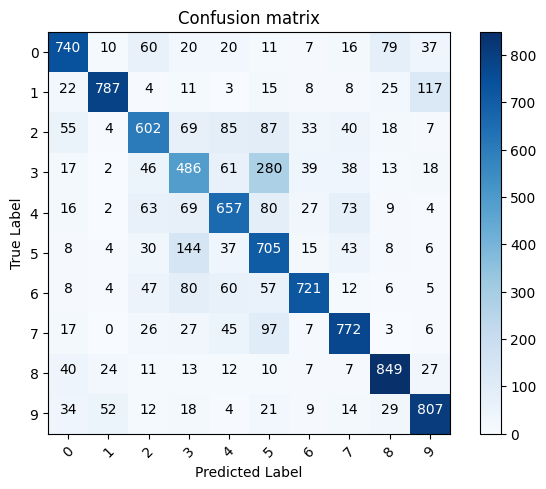

In [9]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print ('Normalized Confusion Matrix')
  else:
    print ('Confusion Matrix, without normalisation')

  print (cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = ".2f" if normalize else 'd'
  thresh = cm.max()/ 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color='white' if cm[i, j] > thresh else "black"
             )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))








In [10]:
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

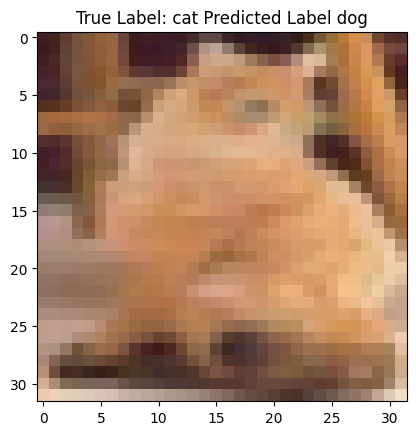

In [13]:
#Now we could check the miusclassified examples like this to actually check what has been going wrong when predicting these values

missclassfied_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassfied_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s Predicted Label %s" % (labels[y_test[i]], labels[p_test[i]]));

In [13]:
# we can see how the deep learning model predicts this image aas a dog, when in reality its a cat.